# SQLALCHEMY CHALLENGE

In [83]:
# Imports
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Jupiter Notebook Database Connection

In [90]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [91]:
# Reflect an existing database into a new model
base = automap_base()

# Reflect the tables
base.prepare(autoload_with=engine)

In [92]:
# View all of the classes found by automap
base.classes.keys()

['measurement', 'station']

In [93]:
# Save references to each table
S = base.classes.station
M = base.classes.measurement

In [94]:
# Create session from Python to the DB
session = Session(engine)

# Precipitation Analysis

In [96]:
# Find the most recent date in the data set
most_recent = session.query(func.max(M.date)).scalar()
print(most_recent)

2017-08-23


In [97]:
# Calculate the date one year from the last date in data set
one_year = session.query(func.date(most_recent, "-1 year")).scalar()
print(one_year)

2016-08-23


In [98]:
# Create a query to retrieve the last 12 months of precipitation data
results = session.query(M.date, M.prcp).filter(M.date.between("2016-08-23", "2017-08-23")).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(results, columns=["date", "precipitation"])

# Print the results
precip_df

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


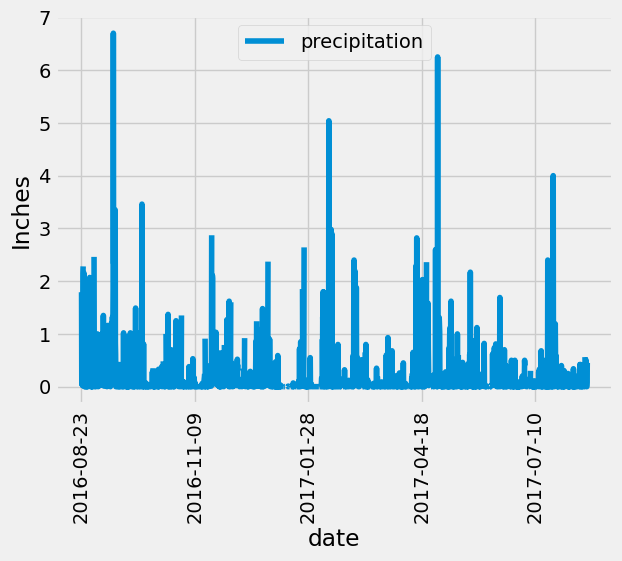

In [99]:
# Sort the dataframe by date
precip_df_sorted = precip_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
precip_df_sorted.plot(x="date", y="precipitation", kind='line')
plt.xticks(rotation=90)
plt.ylabel("Inches")
plt.show()

In [100]:
# Summary statistics for the precipitation data
summary_stats = precip_df_sorted.describe()
summary_stats

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

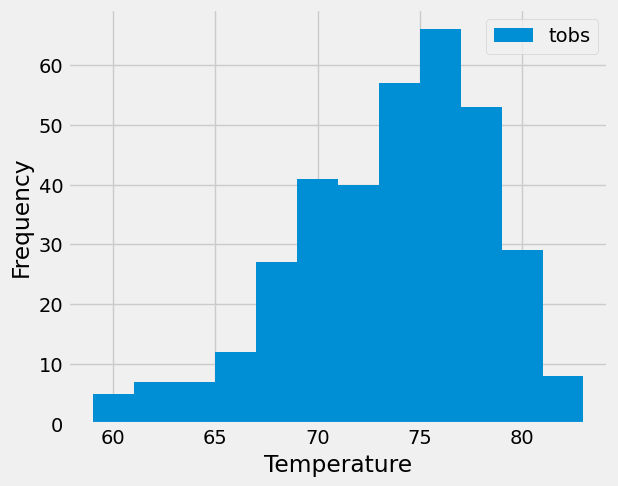

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [11]:
# Close Session
session.close()